In [1]:
import sys
import os

# Add the build directory to Python path
build_dir = os.path.abspath('../lib')
sys.path.insert(0, build_dir)

data_dir = os.path.abspath('../data')
sys.path.insert(0, data_dir)

import pandas as pd
import numpy as np

from tqdm import tqdm

import sorters
import probes

import list_generators as lg

In [2]:
sorts = sorters.list_sorters()
print(sorts)

['heap_sort', 'insertion_sort', 'merge_sort', 'quick_sort', 'quick_merge_sort', 'spin_sort', 'std_sort', 'tim_sort']


In [3]:
sizes = []
for i in range (10, 10_000_000, 500_000):
    sizes.append(i)

print(sizes)

[10, 500010, 1000010, 1500010, 2000010, 2500010, 3000010, 3500010, 4000010, 4500010, 5000010, 5500010, 6000010, 6500010, 7000010, 7500010, 8000010, 8500010, 9000010, 9500010]


In [4]:
insertion_sizes = []
for i in range (10, 10000, 500):
    insertion_sizes.append(i)

data_for_insertion_sort = []
for size in insertion_sizes:
    data_for_insertion_sort.append(lg.randomize_list(lg.generate_list(size)))

dataset = []
for size in sizes:
    dataset.append(lg.randomize_list(lg.generate_list(size)))

In [5]:
insertion_times = []
for arr in tqdm(data_for_insertion_sort):
    insertion_times.append(sorters.benchmark_sorter("insertion_sort", arr))

print(insertion_times)

100%|██████████| 20/20 [00:00<00:00, 436.04it/s]

[0.000416, 0.024666, 0.093, 0.178166, 0.298916, 0.464041, 0.681042, 0.871833, 1.123459, 1.463833, 1.786875, 2.152625, 2.602459, 3.036792, 3.501333, 3.999166, 4.519708, 5.124708, 5.693042, 6.135666]


In [6]:
results = {}

for sort in tqdm(sorts, desc="Sorters"):
    if sort == "insertion_sort":
        continue
    sort_time = []
    for arr in tqdm(dataset, desc=f"Benchmarking {sort}", leave=False):
        sort_time.append(sorters.benchmark_sorter(sort, arr))
    results[sort] = sort_time

df = pd.DataFrame(results)
print(df)

Sorters: 100%|██████████| 8/8 [01:22<00:00, 10.37s/it]

      heap_sort  merge_sort  quick_sort  quick_merge_sort   spin_sort  \
0      0.000417    0.000334    0.002125          0.000292    0.000333   
1     51.734208   31.608333   30.623291         32.860500   31.393125   
2     95.945750   66.210750   63.705833         68.358958   64.942666   
3    149.755542  104.605250  100.060208        103.775209  102.364250   
4    210.813083  140.878042  132.965334        143.330958  136.733417   
5    282.148500  176.040334  169.442042        181.520542  179.555750   
6    348.448250  225.451458  206.039042        219.953875  215.365625   
7    427.622000  257.706166  244.087291        264.123667  252.303709   
8    507.431333  294.143000  284.547750        300.827583  288.011833   
9    589.853958  339.062250  323.324084        341.469583  326.758458   
10   669.995625  373.725292  361.404250        383.149000  375.116083   
11   759.774125  426.258666  396.084458        423.244625  413.105959   
12   845.356292  462.705917  436.413375        463.

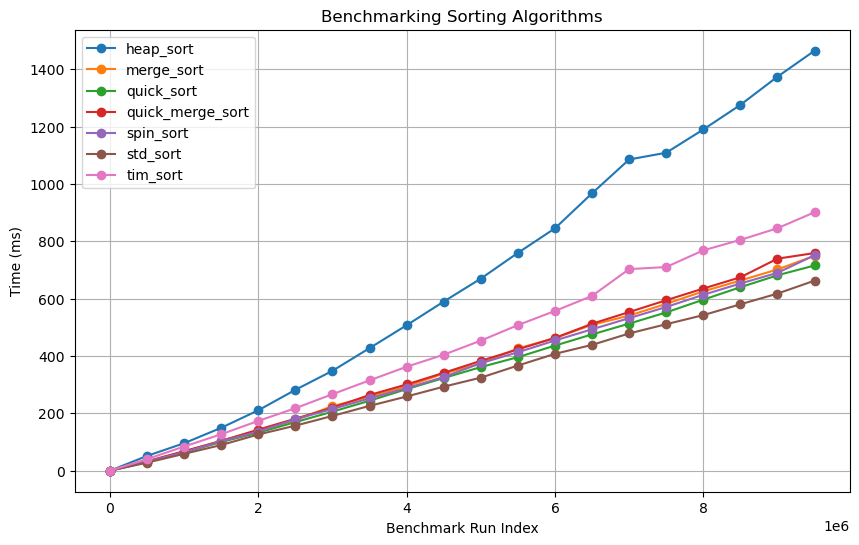

insertion_sort: 2.1876 ms
heap_sort: 670.2751 ms
merge_sort: 363.4924 ms
quick_sort: 346.1506 ms
quick_merge_sort: 369.7375 ms
spin_sort: 357.2181 ms
std_sort: 318.0544 ms
tim_sort: 442.8027 ms


In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

for sort_name in df.columns:
    plt.plot([sizes[i] for i in df.index], df[sort_name], marker='o', label=sort_name)

plt.xlabel("Benchmark Run Index")
plt.ylabel("Time (ms)")
plt.title("Benchmarking Sorting Algorithms")
plt.grid(True)
plt.legend()
plt.show()

# Print mean times.
print(f"insertion_sort: {np.mean(insertion_times):.4f} ms")
for sort_name in df.columns:
    print(f"{sort_name}: {df[sort_name].mean():.4f} ms")

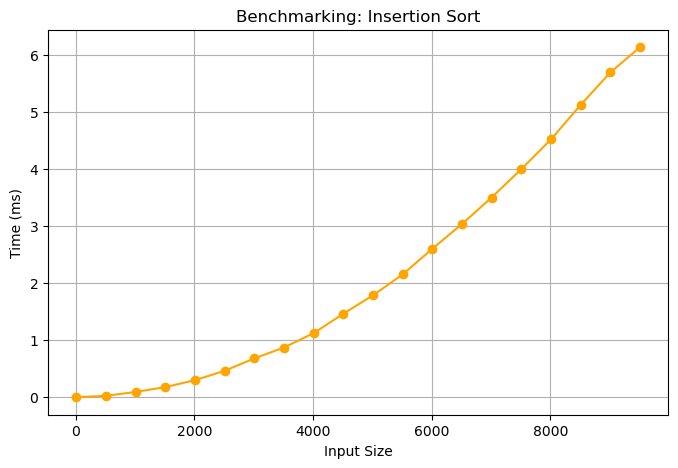

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(insertion_sizes, insertion_times, marker='o', color='orange')
plt.xlabel("Input Size")
plt.ylabel("Time (ms)")
plt.title("Benchmarking: Insertion Sort")
plt.grid(True)
plt.show()

In [9]:
import time

def benchmark_python_sort(arrays):
    total_time = 0.0
    for arr in arrays:
        arr_copy = arr.copy()

        start = time.perf_counter()
        arr_copy.sort()
        end = time.perf_counter()

        total_time += (end - start)
    return total_time * 1000

python_sort_time = benchmark_python_sort(dataset)
print(f"Python default sort benchmark: {python_sort_time:.4f} ms")

Python default sort benchmark: 18763.1711 ms


In [10]:
def benchmark_numpy_sort_kind(arrays, kind='quicksort'):
    total_time = 0.0
    for arr in arrays:
        np_arr = np.array(arr)

        start = time.perf_counter()
        np.sort(np_arr, kind=kind)
        end = time.perf_counter()

        total_time += (end - start)
    return total_time * 1000  

kinds = ['quicksort', 'mergesort', 'heapsort', 'stable']

for kind in kinds:
    sort_time = benchmark_numpy_sort_kind(dataset, kind=kind)
    print(f"NumPy sort ({kind}): {sort_time:.4f} ms")

NumPy sort (quicksort): 4893.6488 ms
NumPy sort (mergesort): 4629.5777 ms
NumPy sort (heapsort): 11120.8176 ms
NumPy sort (stable): 4671.3040 ms
